In [120]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [121]:
# Generate synthetic data for Multiple Linear Regression
def generate_data(n_samples=100, n_features=3):
    """
    Generates synthetic data.

    Parameters
    ----------
    n_samples : int
        The number of data points to generate.
    n_features (int) : No of columns (Features)    

    Returns
    -------
    X (array-like) : Generated input feature values.
    Y (array-like) : Corresponding target values.
    """    
    np.random.seed(42)
    X = 2 * np.random.rand(n_samples, n_features)  # Random values for multiple features
    true_w = np.array([3, 2, 1.5])  # True weights for each feature
    true_c = 4  # Intercept
    noise = np.random.randn(n_samples)  # Random noise
    y = X.dot(true_w) + true_c + noise  # y = Xw + c + noise
    return X, y.reshape(-1, 1)  # Reshape y to column vector

In [122]:
# Compute Mean Squared Error (MSE)
def compute_loss(y_true, y_pred):
    """
    Calculates the Mean Squared Error (MSE) between the true and predicted values.

    Parameters
    ----------
    y_true (array-like) : Actual target values.
    y_pred (array-like) : Predicted values from the model.

    Returns
    -------
    float: The mean squared error value.
    """
    return np.mean((y_true - y_pred) ** 2)

In [123]:
from matplotlib import axis


def compute_gradients(X, y, w, c):
    """
    Computes gradients for the weight vector (w) and bias (c) using MSE loss.
    
    Parameters
    ----------
        X (ndarray) : Feature matrix of shape (n_samples, n_features).
        y (ndarray) : Actual target values.
        w (ndarray) : Weight vector of shape (n_features,).
        c (float) : Bias term.
    
    Returns
    -------
        dw (ndarray) : Gradient of loss w.r.t. weights.
        dc (float) : Gradient of loss w.r.t. bias.
        loss (float) : Computed MSE loss.
    """
    n = len(X)
    y_pred = X.dot(w) + c
    error = y - y_pred

    dw = (-2 / n) * X.T.dot(error)  # Compute gradient for weights
    dw = dw.mean(axis=1)
    dc = (-2 / n) * np.sum(error)   # Compute gradient for bias

    return dw, dc, compute_loss(y, y_pred)

In [124]:
def train_model(X, y, learning_rate=0.01, epochs=1000):
    """
    Trains the model using Gradient Descent to minimize MSE loss.
    
    Parameters
    ----------
        X (ndarray) : Feature matrix of shape (n_samples, n_features).
        y (ndarray) : Target values.
        learning_rate (float) : Step size for gradient descent.
        epochs (int) : Number of iterations for training.

    Returns
    -------
        w (ndarray) : Optimized weight vector.
        c (float) : Optimized bias term.
        loss_history (list) : MSE loss at each epoch.
    """
    n_features = X.shape[1]
    w = np.random.randn(n_features)  # Initialize weights randomly
    c = np.random.randn()  # Initialize bias randomly
    loss_history = []

    print("\nTraining Progress:")
    custom_bar = "{desc}: {percentage:3.0f}% 🚀 |{bar}| 🎯{n_fmt}/{total_fmt} ⏳[{elapsed}<{remaining}, ⚡{rate_fmt}]"
    for epoch in tqdm(range(epochs), ncols=100, bar_format=custom_bar, ascii="▓▒░"):
        dw, dc, loss = compute_gradients(X, y, w, c)
        w -= learning_rate * dw  # Update weights
        c -= learning_rate * dc  # Update bias
        loss_history.append(loss)
        
    print(f"Epoch {epoch}/{epochs}, Loss: {loss:.4f}")        
    return w, c, loss_history 


In [125]:
def predict(X, w, c):
    """
    Predicts output values using the trained model.
    
    Parameters
    ----------
        X (ndarray) : Input feature matrix.
        w (ndarray) : Learned weight vector.
        c (float) : Learned bias term.
    
    Returns
    -------
        ndarray : Predicted values.
    """
    return X.dot(w) + c

In [126]:
def plot_loss(loss_history):
    """
    Plots the training loss over epochs.
    
    Parameters
    ----------
        loss_history (list) : List of loss values at each epoch.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(loss_history)), loss_history, color='blue', label="Loss")
    plt.xlabel("Epochs")
    plt.ylabel("MSE Loss")
    plt.title("Training Loss Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

(80, 3) (80, 1)

Training Progress:


100% 🚀 |░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░░| 🎯10000/10000 ⏳[00:01<00:00, ⚡9585.30it/s]


Epoch 9999/10000, Loss: 6.4634

Final parameters: w = [ 0.3747992  -0.40614017  1.18256866], c = 9.4299


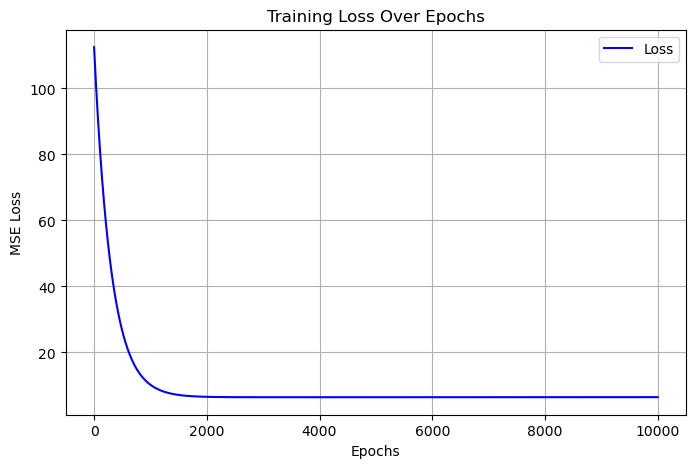

In [127]:
# Main execution
if __name__ == "__main__":
    X, Y = generate_data(n_samples=100, n_features=3)
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
    print(x_train.shape, y_train.shape)
    w, c, loss_history = train_model(x_train, y_train, learning_rate=0.00001, epochs=10000)
    
    print(f"\nFinal parameters: w = {w}, c = {c:.4f}")
    
    plot_loss(loss_history)  # Plot loss curve

    # Example Predictions
    y_pred = predict(x_test, w, c)
    y_pred.shape